<a href="https://colab.research.google.com/github/ArunK-ML/Project---Brain-Tumor-MRI-Image-Classification/blob/main/Brain_Tumor_MRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [3]:
!pip install tensorflow>=2.9.0 scikit-learn matplotlib pillow streamlit numpy

# **Data Load**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
DATASET_DIR = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour"
TRAIN_DIR = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/train"
TEST_DIR  = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/test"
VALID_DIR = "/content/drive/MyDrive/Project_DataSets_GUVI/Tumour-20250909T193851Z-1-001/Tumour/valid"


# **Data View**

In [6]:
import os

for split in ["train", "valid", "test"]:
    folder = os.path.join(DATASET_DIR, split)
    print(f"\n--- {split.upper()} ---")
    for cls in os.listdir(folder):
        cls_path = os.path.join(folder, cls)
        if os.path.isdir(cls_path):
            print(f"{cls:15s} -> {len(os.listdir(cls_path))} images")



--- TRAIN ---
no_tumor        -> 335 images
pituitary       -> 438 images
meningioma      -> 358 images
glioma          -> 564 images

--- VALID ---
glioma          -> 161 images
no_tumor        -> 99 images
meningioma      -> 124 images
pituitary       -> 118 images

--- TEST ---
pituitary       -> 54 images
no_tumor        -> 49 images
glioma          -> 80 images
meningioma      -> 63 images


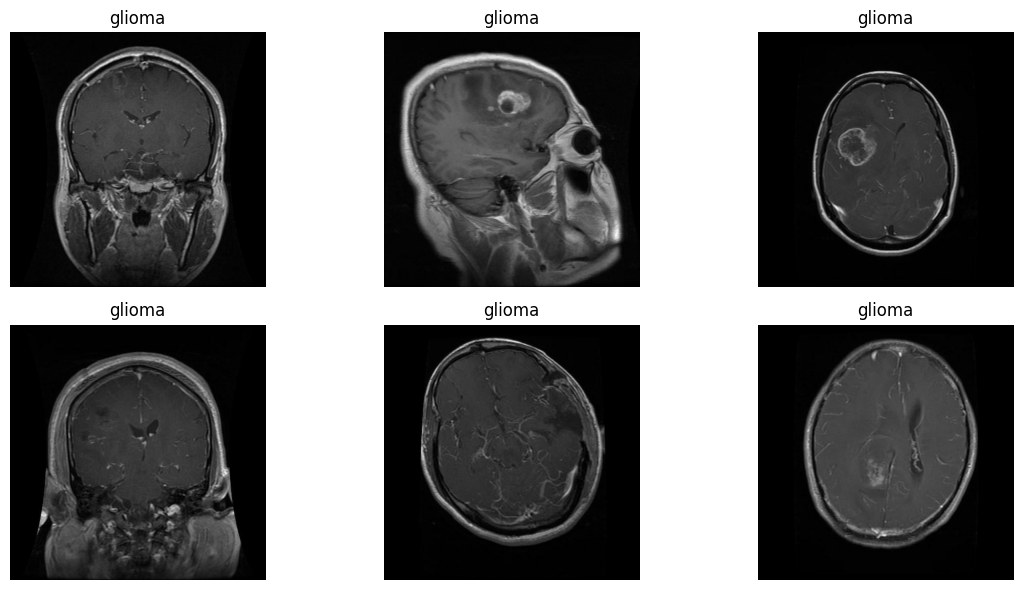

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

SPLIT = "train"  # change to "valid" or "test"
CLASS = random.choice(os.listdir(os.path.join(DATASET_DIR, SPLIT)))
IMG_DIR = os.path.join(DATASET_DIR, SPLIT, CLASS)

images = random.sample(os.listdir(IMG_DIR), 6)  # pick 6 random images

plt.figure(figsize=(12,6))
for i, img_name in enumerate(images):
    img_path = os.path.join(IMG_DIR, img_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(CLASS)
    plt.axis("off")
plt.tight_layout()
plt.show()


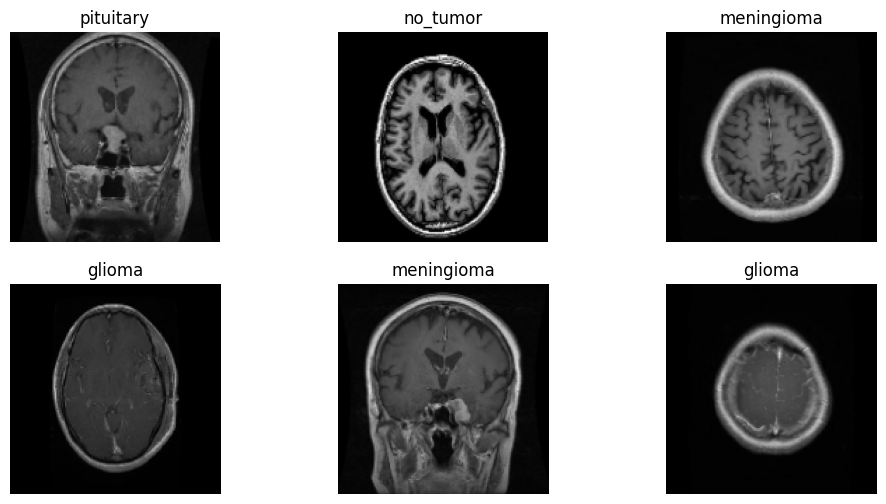

In [10]:
x_batch, y_batch = next(train_gen)  # one batch of images
plt.figure(figsize=(12,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_batch[i])
    label = list(train_gen.class_indices.keys())[y_batch[i].argmax()]
    plt.title(label)
    plt.axis("off")
plt.show()

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation and preprocessing for training images
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

# Define data preprocessing for validation and test images
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_gen = train_datagen.flow_from_directory(TRAIN_DIR,
                                              target_size=(150, 150), # Adjust target size as needed
                                              batch_size=32,
                                              class_mode='categorical')

valid_gen = valid_test_datagen.flow_from_directory(VALID_DIR,
                                                   target_size=(150, 150), # Adjust target size as needed
                                                   batch_size=32,
                                                   class_mode='categorical')

test_gen = valid_test_datagen.flow_from_directory(TEST_DIR,
                                                  target_size=(150, 150), # Adjust target size as needed
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 1695 images belonging to 4 classes.
Found 502 images belonging to 4 classes.
Found 246 images belonging to 4 classes.
